In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from matplotlib import animation, rc

In [2]:
@jit
def laplacian(ix, iy, s):
    ts = 0.0
    ts += s[ix-1, iy]
    ts += s[ix+1, iy]
    ts += s[ix, iy-1]
    ts += s[ix, iy+1]
    ts -= 4.0*s[ix, iy]
    return ts

In [3]:
@jit
def calc(u, v, u2, v2):
    (L, _) = u.shape
    dt = 0.2
    F = 0.04
    k = 0.06075
    lu = np.zeros((L, L))
    lv = np.zeros((L, L))
    for ix in range(1, L-1):
        for iy in range(1, L-1):
            lu[ix, iy] = 0.1 * laplacian(ix, iy, u)
            lv[ix, iy] = 0.05 * laplacian(ix, iy, v)
    cu = -v*v*u + F*(1.0 - u)
    cv = v*v*u - (F+k)*v
    u2[:] = u + (lu+cu) * dt
    v2[:] = v + (lv+cv) * dt

In [7]:
@jit
def simulation():
    L = 64
    u = np.zeros((L, L))
    u2 = np.zeros((L, L))
    v = np.zeros((L, L))
    v2 = np.zeros((L, L))
    h = L//2
    r = []
    u[h-6:h+6, h-6:h+6] = 0.9
    v[h-3:h+3, h-3:h+3] = 0.7
    for i in range(10000):
        if i % 2 == 0:
            calc(u, v, u2, v2)
        else:
            calc(u2, v2, u, v)
        if i%100 == 0:
            r.append(u.copy())
    return r

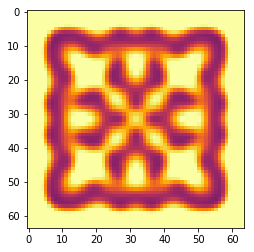

In [12]:
imgs = simulation()
fig = plt.figure()
im = plt.imshow(imgs[99], cmap="inferno",vmin = 0, vmax = 0.8)